# **Understanding The LSTM Layers**

- SimpleRNN isn’t the only recurrent layer available in Keras. 

- There are two others: LSTM and GRU. In practice, we’ll always use one of these, because SimpleRNN is generally too simplistic to be of real use.

- SimpleRNN has a major issue: although it should theoretically
be able to retain at time t information about inputs seen many timesteps before.

- In practice, such long-term dependencies are impossible to learn. 

- Unfortunately, as that gap grows, SimpleRNNs become unable to learn to
connect the information.

- This is due to the vanishing gradient problem, an effect that is similar to what is observed with non-recurrent networks (feedforward networks) that are many layers deep: as we keep adding layers to a network, the network eventually becomes untrainable. 

- The theoretical reasons for this effect were studied by Hochreiter Schmidhuber, and Bengio in the early 1990s.

- The LSTM and GRU layers are designed to solve this problem.

## **Let's consider the LSTM layer:**

- Long Short-Term Memory (LSTM) algorithm was developed by Hochreiter and Schmidhuber in 1997, it was the culmination of their research on the vanishing gradient problem.

- LSTM are a special kind of SimpleRNN, capable of learning long-term dependencies. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

- It adds a way to carry information across many timesteps.

- It saves information for later, thus preventing older signals from gradually vanishing during processing.

- They work tremendously well on a large variety of problems, and are now widely used.

## **The Core Idea Behind LSTMs**

- Credit [Colah Blog](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)



- The key to LSTMs is the cell state, the horizontal line running through the top of the diagram.

- The cell state is kind of like a conveyor belt. It runs straight down the entire chain, with only some minor linear interactions. It’s very easy for information to just flow along it unchanged.

- The LSTM does have the ability to remove or add information to the cell state, carefully regulated by structures called gates.

- Gates are a way to optionally let information through. They are composed out of a sigmoid neural net layer and a pointwise multiplication operation.

- The sigmoid layer outputs numbers between zero and one, describing how much of each component should be let through. A value of zero means “let nothing through,” while a value of one means “let everything through!”

- An LSTM has three of these gates, to protect and control the cell state.
 - Forget Gate
 - Input Gate
 - Output Gate
 
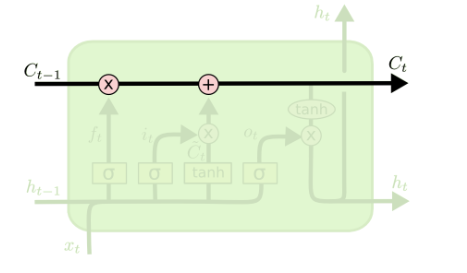

## **Step-by-Step LSTM Walk Through**

- The first step in our LSTM is to decide what information we’re going to throw away from the cell state. 

- This decision is made by a sigmoid layer called the “forget gate layer.” 

- It looks at ht−1 and xt, and outputs a number between 0 and 1 for each number in the cell state Ct−1. 

- 1 represents “completely keep this” while a 0 represents “completely get rid of this.”

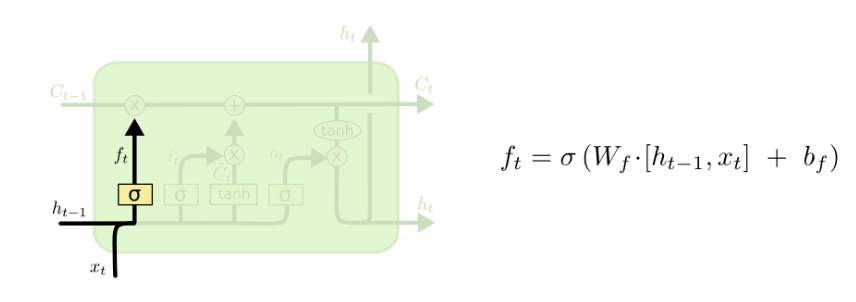

- The next step is to decide what new information we’re going to store in the cell state. 

- This has two parts.
 - First, a sigmoid layer called the “input gate layer” decides which values we’ll update. 
 - Next, a tanh layer creates a vector of new candidate values, C~t, that could be added to the state. 

- In the next step, we’ll combine these two to create an update to the state.

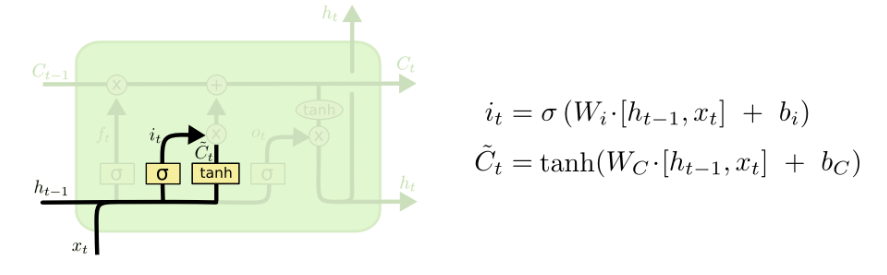

- It’s now time to update the old cell state, Ct−1, into the new cell state Ct.

- The previous steps already decided what to do, we just need to actually do it.

- We multiply the old state by ft, forgetting the things we decided to forget earlier. 

- Then we add it∗C~t. 

- This is the new candidate values, scaled by how much we decided to update each state value.

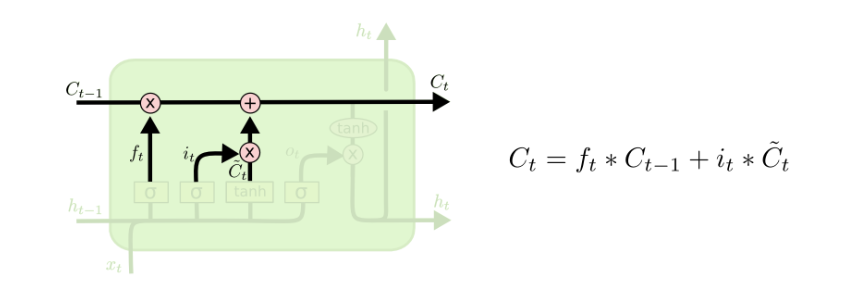

- Finally, we need to decide what we’re going to output. 

- This output will be based on our cell state, but will be a filtered version.

- First, we run a sigmoid layer which decides what parts of the cell state we’re going to output. 

- Then, we put the cell state through tanh (to push the values to be between −1 and 1) and multiply it by the output of the sigmoid gate, so that we only output the parts we decided to.

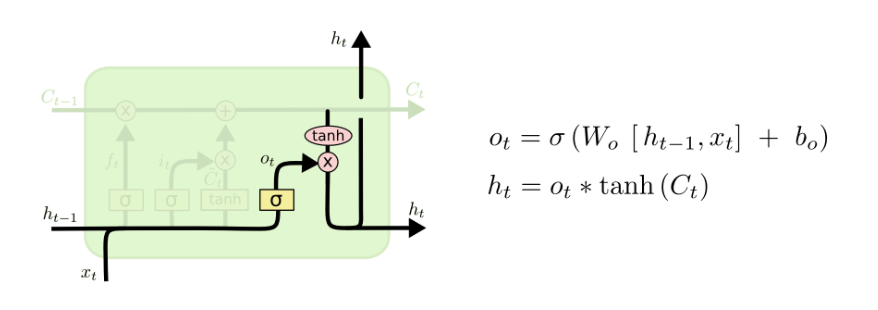

## **Variants on Long Short Term Memory**

- What We’ve discussed so far is a pretty normal LSTM. But not all LSTMs are the same as the above.

----------------------------------------------------------------------------

- One popular LSTM variant, introduced by Gers & Schmidhuber (2000), is adding “peephole connections.” This means that we let the gate layers look at the cell state.

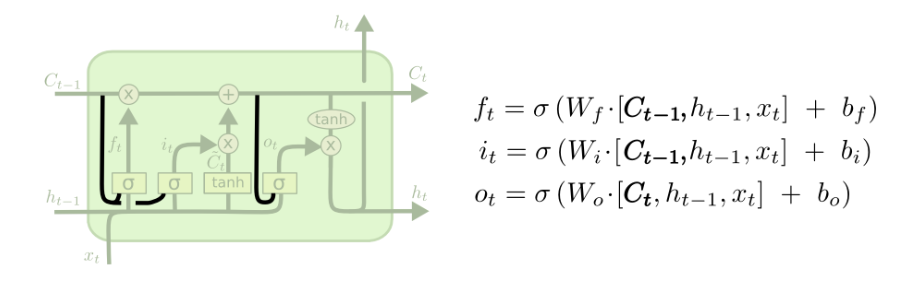

- The above diagram adds peepholes to all the gates.


### **GRU (Gated Recurrent Unit)**

- A slightly more dramatic variation on the LSTM is the Gated Recurrent Unit, or GRU, introduced by Cho, et al. (2014). 

- It combines the forget and input gates into a single “update gate.” 

- It also merges the cell state and hidden state, and makes some other changes.

- The resulting model is simpler than standard LSTM models, and has been growing increasingly popular.

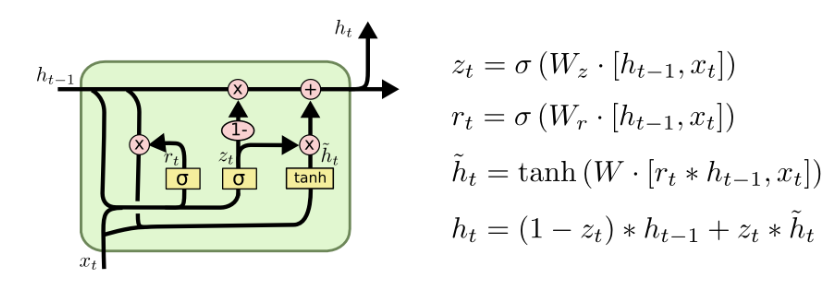

- These are only a few of the most notable LSTM variants. 

- There are lots of others, like Depth Gated RNNs by Yao, et al. (2015).

- There’s also some completely different approach to tackling long-term dependencies, like Clockwork RNNs by Koutnik, et al. (2014).

### **A concrete LSTM example in Keras**

In [1]:
# Preparing the IMDB data

from keras.datasets import imdb
from keras.preprocessing import sequence

max_feature = 1000  # Number of words to consider as features
maxlen = 500        # Cuts off text after this many words 
batch_size = 32

In [2]:
print('Loading data......')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_feature)

Loading data......
17464789/17464789 [==============================] - 0s 0us/step


In [3]:
print(len(input_train), 'train sequences')

25000 train sequences


In [4]:
print(len(input_test), 'test sequences')

25000 test sequences


In [5]:
from keras.utils import pad_sequences
print('Pad sequences (samples x time)')
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


#### **Let's train a simple recurrent network using an Embedding layer and LSTM layer.**

In [8]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Embedding

In [9]:
model = Sequential()
model.add(Embedding(max_feature, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [10]:
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 60s 365ms/step - loss: 0.5515 - acc: 0.7233 - val_loss: 0.4834 - val_acc: 0.7770
Epoch 2/10
157/157 [==============================] - 57s 363ms/step - loss: 0.4000 - acc: 0.8264 - val_loss: 0.4225 - val_acc: 0.8110
Epoch 3/10
157/157 [==============================] - 58s 369ms/step - loss: 0.3589 - acc: 0.8497 - val_loss: 0.4850 - val_acc: 0.7962
Epoch 4/10
157/157 [==============================] - 58s 367ms/step - loss: 0.3414 - acc: 0.8567 - val_loss: 0.3722 - val_acc: 0.8370
Epoch 5/10
157/157 [==============================] - 55s 352ms/step - loss: 0.3294 - acc: 0.8612 - val_loss: 0.4545 - val_acc: 0.7844
Epoch 6/10
157/157 [==============================] - 55s 353ms/step - loss: 0.3204 - acc: 0.8675 - val_loss: 0.3883 - val_acc: 0.8320
Epoch 7/10
157/157 [==============================] - 56s 355ms/step - loss: 0.3142 - acc: 0.8713 - val_loss: 0.3291 - val_acc: 0.8630
Epoch 8/10
157/157 [==============================] - 5

- Now, let's display the training and validation loss and accuracy

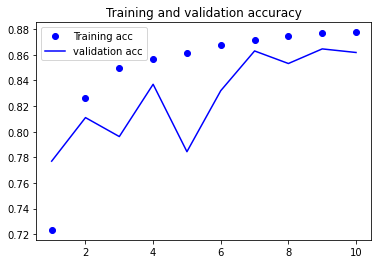

In [11]:
# Plotting results

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')

plt.title('Training and validation accuracy')
plt.legend()
plt.show()

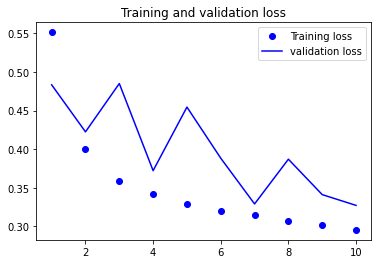

In [12]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')

plt.title('Training and validation loss')
plt.legend()
plt.show()

- This time, we achieve up to 86% validation accuracy. Not bad: certainly much better than the SimpleRNN network—that’s largely because LSTM suffers much less from the vanishing-gradient problem—and slightly better than the fully connected approach, even though we’re looking at less data. We’re truncating sequences after 500 timesteps.

- But this result isn’t groundbreaking for such a computationally intensive
approach. 

#### **Why isn’t LSTM performing better?** 

- One reason is that we made no effort to tune hyperparameters such as the embeddings dimensionality or the LSTM output dimensionality.

- Another may be lack of regularization. 

- But the primary reason is that analyzing the global, long-term structure of the reviews (what LSTM is good at) isn’t helpful for a sentiment-analysis problem. 

- Such a basic problem is well solved by looking at what words occur in each review, and at what frequency. 

- But there are far more difficult naturallanguage-processing problems out there, where the strength of LSTM will become apparent: in particular, question-answering and machine translation.